In [ ]:
# Dict which represents the genetic code – 
# the keys are codons and the values are amino acids
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'}

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


In [ ]:
def translation(seq): 
  num=0
  proteinseq= ""
  if ((len(seq) % 3) ==1):
    seq = seq[0:(len(seq)-1)]
  elif ((len(seq) % 3) ==2):
    seq = seq[0:(len(seq)-2)]
  for i in range(0,len(seq),3):
    codon = seq[num:(num+3)]
    num += 3
    proteinseq+= gencode[codon]
  return proteinseq

In [ ]:
pip install biopython

     |████████████████████████████████| 2.3MB 7.5MB/s 


ENA|AAC31763|AAC31763.1
ATGAATGGCACAGAAGGCCCTAACTTCTACGTGCCCTTCTCCAATGCGACGGGTGTGGTACGCAGCCCCTTCGAGTACCCACAGTACTACCTGGCTGAGCCATGGCAGTTCTCCATGCTGGCCGCCTACATGTTTCTGCTGATCGTGCTGGGCTTCCCCATCAACTTCCTCACGCTCTACGTCACCGTCCAGCACAAGAAGCTGCGCACGCCTCTCAACTACATCCTGCTCAACCTAGCCGTGGCTGACCTCTTCATGGTCCTAGGTGGCTTCACCAGCACCCTCTACACCTCTCTGCATGGATACTTCGTCTTCGGGCCCACAGGATGCAATTTGGAGGGCTTCTTTGCCACCCTGGGCGGTGAAATTGCCCTGTGGTCCTTGGTGGTCCTGGCCATCGAGCGGTACGTGGTGGTGTGTAAGCCCATGAGCAACTTCCGCTTCGGGGAGAACCATGCCATCATGGGCGTTGCCTTCACCTGGGTCATGGCGCTGGCCTGCGCCGCACCCCCACTCGCCGGCTGGTCCAGGTACATCCCCGAGGGCCTGCAGTGCTCGTGTGGAATCGACTACTACACGCTCAAGCCGGAGGTCAACAACGAGTCTTTTGTCATCTACATGTTCGTGGTCCACTTCACCATCCCCATGATTATCATCTTTTTCTGCTATGGGCAGCTCGTCTTCACCGTCAAGGAGGCCGCTGCCCAGCAGCAGGAGTCAGCCACCACACAGAAGGCAGAGAAGGAGGTCACCCGCATGGTCATCATCATGGTCATCGCTTTCCTGATCTGCTGGGTGCCCTACGCCAGCGTGGCATTCTACATCTTCACCCACCAGGGCTCCAACTTCGGTCCCATCTTCATGACCATCCCAGCGTTCTTTGCCAAGAGCGCCGCCATCTACAACCCTGTCATCTATATCATGATGAACAAGCAGTTCCGGAACTGCATGCTCACCACCATCTGCTGCGGCAAGA

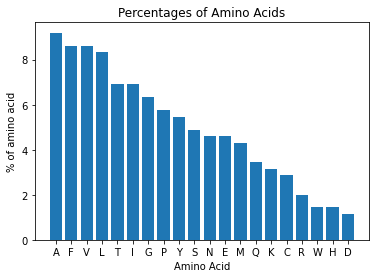

9.195402298850574 1.1494252873563218


In [ ]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np


def aaseq(fastafilename):
  for seq_record in SeqIO.parse("./drive/My Drive/" + fastafilename, "fasta"):
    my_seq= (seq_record.seq)
    info = seq_record.id
  print(info)
  print((my_seq))
  print(my_seq.complement())
  proseq= (translation(my_seq))
  aadict={}
  for i in proseq:
    if i not in aadict:
      aadict[i] = 1
    else :
      aadict[i]+=1

  print(aadict)
  f = open("P08100_aaCount.txt", "a")
  for i in aadict.keys():
    print(i, aadict[i])
    #f.write(i + "\t" + str(aadict[i])+ "\n")
   
  f.close()
  minimum = min(aadict.values())
  maximum = max(aadict.values())
  print(minimum, maximum)
  for i in aadict:
    if (aadict[i]==maximum):
      maxaa = i
    elif (aadict[i]== minimum):
      minaa= i
  aadict.pop(i)
  minimum = min(aadict.values())
  for i in aadict:
    if (aadict[i]== minimum):
      minaa= i
  print("Most common amino acid is" ,maxaa, "while the least common amino acid is", minaa)
  percentagedict = {}
  summ = sum(aadict.values())
  for i in aadict:
    percentagedict[i]= (aadict[i]/summ)*100
  print(percentagedict)
  #percentagedict = sorted(percentagedict,reverse=True)
  sorted_dict = {}
  sorted_keys = sorted(percentagedict, key= percentagedict.get, reverse=True)  # [1, 3, 2]
  for w in sorted_keys:
    sorted_dict[w] = percentagedict[w]
  plt.bar(sorted_dict.keys(), sorted_dict.values())
  plt.title("Percentages of Amino Acids")
  plt.ylabel("% of amino acid")
  plt.xlabel("Amino Acid")
  plt.show()
  print(percentagedict["A"], percentagedict["D"])
aaseq("AAC31763.1.fasta")



In [ ]:
### In the Uniprot, most common amino acid is L (Leu) with 9.86% while the least common amino acid is 
### C (Cys) with 1.24% for the complete database. In the other hand, for the rhodopsin protein, most common 
### amino acid is A (Ala) with 9.2%, while least common amino acid is D (Asp) with %1.15. We can see that 
### in the Uniprot second most common amino acid is Ala with 9.23% which is very close to the percentage 
### of Ala in rhodopsin's protein sequence. For overall distribution, although there is a lot differences 
### between the frequencies of some proteins, rhodopsin's distribution is quite similar to the general
### amino acid distribution in Uniprot.


## Classification of the amino acids by their frequency in Uniprot
##   Leu, Ala, Gly, Val, Ser, Glu, Arg, Thr, Ile, Asp, Pro, Lys, Phe, Asn,
##   Gln, Tyr, Met, His, Trp, Cys
##
## Classification of the amino acids by their frequency within Rhodopsin
##   Ala, Phe, Val, Leu, Thr, Ile, Gly, Pro, Tyr, Ser, Asn, Glu, Met, Gln
##   Lys, Cys, Arg, Trp, His, Asp



In [ ]:
hydropathy = {  
    "I":4.5 , 'V':4.2, 'L':3.8, 'F':2.8,
    'C':2.5, 'M':1.9, 'A':1.8, 'G':-0.4,
    'T':-0.7, 'W':-0.9, 'S':-0.8, 'Y':-1.3,
    'P':-1.6, 'H':-3.2, 'E':-3.5, 'Q':-3.5,
    'D':-3.5, 'N':-3.5, 'K':-3.9, 'R':-4.5}

ATGAATGGCACAGAAGGCCCTAACTTCTACGTGCCCTTCTCCAATGCGACGGGTGTGGTACGCAGCCCCTTCGAGTACCCACAGTACTACCTGGCTGAGCCATGGCAGTTCTCCATGCTGGCCGCCTACATGTTTCTGCTGATCGTGCTGGGCTTCCCCATCAACTTCCTCACGCTCTACGTCACCGTCCAGCACAAGAAGCTGCGCACGCCTCTCAACTACATCCTGCTCAACCTAGCCGTGGCTGACCTCTTCATGGTCCTAGGTGGCTTCACCAGCACCCTCTACACCTCTCTGCATGGATACTTCGTCTTCGGGCCCACAGGATGCAATTTGGAGGGCTTCTTTGCCACCCTGGGCGGTGAAATTGCCCTGTGGTCCTTGGTGGTCCTGGCCATCGAGCGGTACGTGGTGGTGTGTAAGCCCATGAGCAACTTCCGCTTCGGGGAGAACCATGCCATCATGGGCGTTGCCTTCACCTGGGTCATGGCGCTGGCCTGCGCCGCACCCCCACTCGCCGGCTGGTCCAGGTACATCCCCGAGGGCCTGCAGTGCTCGTGTGGAATCGACTACTACACGCTCAAGCCGGAGGTCAACAACGAGTCTTTTGTCATCTACATGTTCGTGGTCCACTTCACCATCCCCATGATTATCATCTTTTTCTGCTATGGGCAGCTCGTCTTCACCGTCAAGGAGGCCGCTGCCCAGCAGCAGGAGTCAGCCACCACACAGAAGGCAGAGAAGGAGGTCACCCGCATGGTCATCATCATGGTCATCGCTTTCCTGATCTGCTGGGTGCCCTACGCCAGCGTGGCATTCTACATCTTCACCCACCAGGGCTCCAACTTCGGTCCCATCTTCATGACCATCCCAGCGTTCTTTGCCAAGAGCGCCGCCATCTACAACCCTGTCATCTATATCATGATGAACAAGCAGTTCCGGAACTGCATGCTCACCACCATCTGCTGCGGCAAGAACCCACTGGGTGACGATGAGGCCT

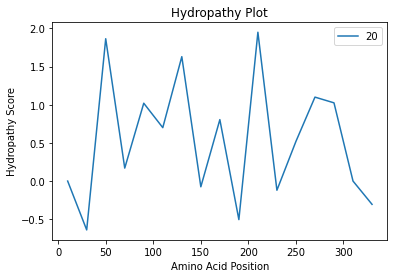

[-1.24, -0.8, 0.2200000000000001, 1.8200000000000003, -1.52, -1.8, -0.0800000000000001, 0.8399999999999999, 1.4, 4.0200000000000005, 0.36, 1.6799999999999997, 0.2, -1.8399999999999999, 0.3799999999999999, 1.94, 1.8199999999999998, 1.8199999999999996, 0.8799999999999999, -0.44000000000000006, 1.6199999999999999, -0.12000000000000002, -0.16000000000000006, 1.4599999999999997, 1.24, 2.1, 0.41999999999999993, 2.7600000000000002, -1.58, -0.56, 0.29999999999999993, 1.54, 2.16, 1.2599999999999998, 0.54, -0.74, -0.22000000000000003, 0.45999999999999996, -0.6799999999999999, -1.5799999999999998, 1.44, 2.3600000000000003, 0.3599999999999999, 3.6399999999999997, 0.020000000000000018, 2.8600000000000003, -0.4000000000000002, -2.96, -1.4, -0.9799999999999999, 1.08, 3.3800000000000003, 2.54, 0.45999999999999996, 2.4, -1.0000000000000002, -0.7, 2.6, 1.52, 0.6799999999999999, 0.45999999999999996, 0.7, -2.5200000000000005, 1.3599999999999999, 1.0399999999999998, -1.0399999999999998, -0.8400000000000001

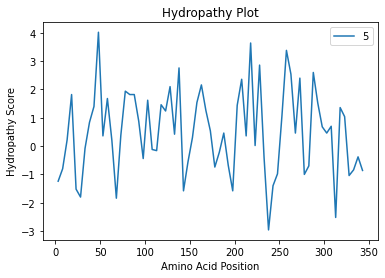

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


path = "./drive/My Drive/"
filename = "AAC31763.1.fasta"
my_file = open(path+filename,"r")
contents = my_file.readlines()
seq=""
for line in contents[1:]:
  line = line.strip("\n")
  seq += line
print(seq)
print(len(seq))
print(len(translation(seq)))


def hydropathy_calculator(proteinseq , windowsize):
  sumhydropathy= 0
  proteinseq = proteinseq[:len(proteinseq)-1]
  for aa in proteinseq:
    sumhydropathy+= hydropathy[aa]
  avg = sumhydropathy/(len(proteinseq))
  listofhyd= []
  listofaa=[]
  s=0
  for w in range(int(len(proteinseq)/windowsize)):
    sum = 0
    for d in range(windowsize):
      sum+= hydropathy[proteinseq[s]]
      s+=1
    listofhyd.append(sum/windowsize)
    listofaa.append(s-int(windowsize/2))
  print(listofhyd)
  print(listofaa)
  plt.plot(listofaa,listofhyd, label = windowsize)
  plt.title("Hydropathy Plot")
  plt.xlabel("Amino Acid Position")
  plt.legend()
  plt.ylabel("Hydropathy Score")
  plt.show()


hydropathy_calculator(translation(seq),20)
hydropathy_calculator(translation(seq),5)



In [ ]:
  # When we set window size from 5 to 20, fluctuations of the scores get rare although the overall hydropathy score doesn't 
  # change. Instead of random fluctuations, we can clearly see the increases and decreases in score. Furthermore it becomes 
  # easy to see the regions where the hydropathy score is higher. With that information, we can comment about the hydrophobicity
  # of that region.

  # Transmembrane helices start from positions 37 to 61, 74 to 96, 111 to 133, 153 to 173, 203 to 224 253 to 274, 285 to 309. 
  # When we look at the plot graph, these intervals are where the hydropathy score got higher. We know that high hdropathy 
  # score points to high hydrophobicity. Thus we can conclude that the membrane is hydrophobic. As the hydrophobic tails of 
  # phospholipids left inside de phospholipid bilayer of the membrane, transmembrane parts of the protein should be hydrophobic 
  # regions of that protein.